In [1]:
from experiment import Experiment
import torch
torch.manual_seed(2)
%matplotlib inline

In [2]:
var_dict = dict(
    numerical_vars = ['Number_of_times_pregnant','Plasma_glucose','Diastolic_blood_pressure',
                      'Triceps_skin_fold_thickness','serum_insulin','Body_mass_index',
                      'Diabetes_pedigree_function','Age'],
    class_var = 'class'
)

In [ ]:
exp = Experiment('data/pima.csv', 
                 var_dict,
                 embedding_dim=4,
                 lr=5e-3,
                 weight_decay=1e-7,
                 batch_size=1024,
                 n_epoch=100,
                 verbose=False,
                 n_bins_range=range(2, 21),
                 n_init_bins_list=[10,15,20,25,30])

In [ ]:
%time clustering_scores = exp.test_clustering_performance()

In [ ]:
exp.print_clustering_scores(clustering_scores, method='dummy_only')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='scale_numeric')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='equal_width')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='equal_freq')

In [ ]:
exp.print_clustering_scores(clustering_scores, method='semantic_binning')

In [ ]:
%time clf_scores = exp.test_classification_performance(cv=3)

In [ ]:
exp.print_classification_scores(clf_scores, method='dummy_only')

In [ ]:
exp.print_classification_scores(clf_scores, method='scale_numeric')

In [ ]:
exp.print_classification_scores(clf_scores, method='equal_width')

In [ ]:
exp.print_classification_scores(clf_scores, method='equal_freq')

In [ ]:
exp.print_classification_scores(clf_scores, method='semantic_binning')

In [4]:
from data_handler import DataHandler
handler = DataHandler(exp.data, exp.var_dict)
from semantic_binning import SemanticBinning
sb = SemanticBinning(handler.var_dict, embedding_dim=4, batch_size=1024, 
                     n_epoch=100, lr=5e-3, weight_decay=1e-7, verbose=True)
sb.fit(exp.data, n_init_bins=15)

>>> Epoch = 1, Loss = 0.5521160960197449
[9, 9, 8, 9, 8, 10, 12, 11]
>>> Epoch = 2, Loss = 0.36863812804222107
[7, 9, 7, 7, 8, 6, 8, 11]
>>> Epoch = 3, Loss = 0.2806593179702759
[9, 5, 7, 7, 8, 6, 8, 12]
>>> Epoch = 4, Loss = 0.24622973799705505
[8, 5, 12, 10, 8, 12, 9, 11]
>>> Epoch = 5, Loss = 0.23919393122196198
[9, 5, 14, 10, 8, 8, 10, 11]
>>> Epoch = 6, Loss = 0.2403489649295807
[9, 5, 14, 10, 8, 13, 10, 11]
0 5
>>> Epoch = 7, Loss = 0.2385169267654419
[9, 5, 14, 10, 8, 13, 10, 11]
1 5
>>> Epoch = 8, Loss = 0.23939669132232666
[9, 13, 14, 10, 8, 13, 10, 11]
0 5
>>> Epoch = 9, Loss = 0.2328539341688156
[9, 13, 14, 10, 8, 13, 9, 11]
0 5
>>> Epoch = 10, Loss = 0.23552702367305756
[9, 13, 14, 10, 8, 13, 10, 11]
1 5
>>> Epoch = 11, Loss = 0.23492980003356934
[9, 13, 14, 10, 8, 13, 10, 11]
2 5
>>> Epoch = 12, Loss = 0.2387259304523468
[6, 13, 14, 10, 8, 13, 10, 11]
0 5
>>> Epoch = 13, Loss = 0.23699186742305756
[6, 13, 14, 10, 8, 13, 10, 11]
1 5
>>> Epoch = 14, Loss = 0.2318806648254394

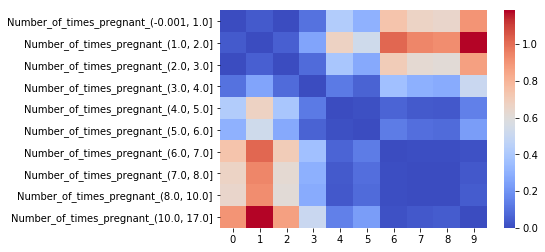

In [5]:
sb.plot_pairwise_distance_between_bins('Number_of_times_pregnant')

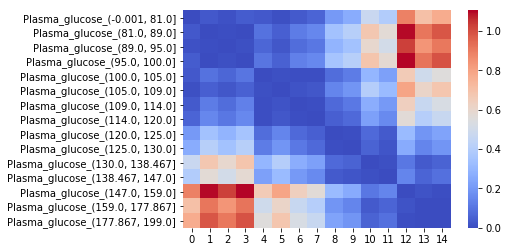

In [6]:
sb.plot_pairwise_distance_between_bins('Plasma_glucose')

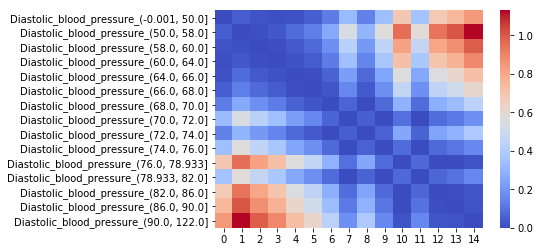

In [7]:
sb.plot_pairwise_distance_between_bins('Diastolic_blood_pressure')

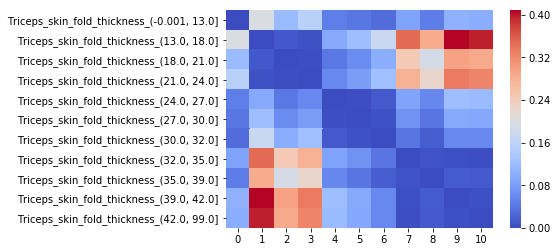

In [8]:
sb.plot_pairwise_distance_between_bins('Triceps_skin_fold_thickness')

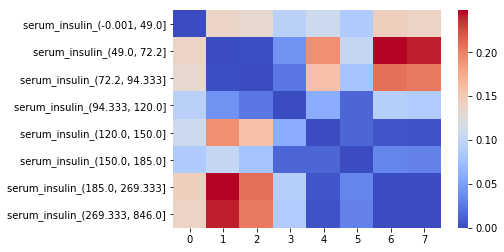

In [9]:
sb.plot_pairwise_distance_between_bins('serum_insulin')

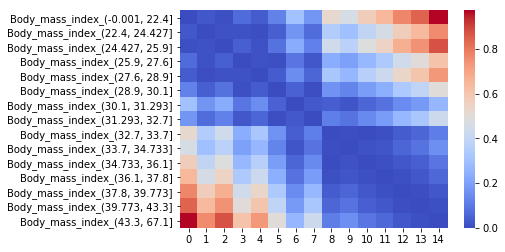

In [10]:
sb.plot_pairwise_distance_between_bins('Body_mass_index')

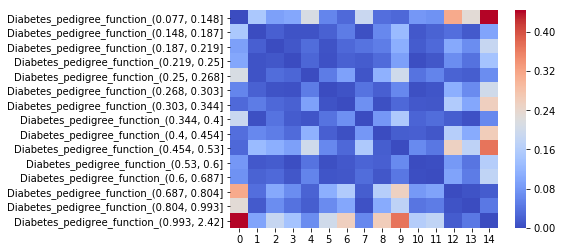

In [11]:
sb.plot_pairwise_distance_between_bins('Diabetes_pedigree_function')

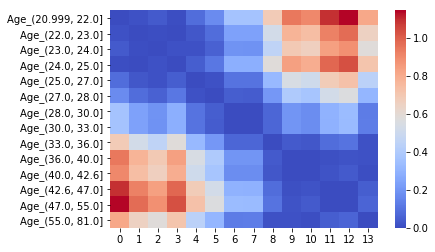

In [12]:
sb.plot_pairwise_distance_between_bins('Age')

In [13]:
for var, bins in sb.bins_by_var.items():
    print(var)
    print(bins['bins'])

Number_of_times_pregnant
['(-0.001, 4.0]', '(4.0, 17.0]']
Plasma_glucose
['(-0.001, 81.0]', '(81.0, 100.0]', '(100.0, 105.0]', '(105.0, 109.0]', '(109.0, 120.0]', '(120.0, 130.0]', '(130.0, 147.0]', '(147.0, 199.0]']
Diastolic_blood_pressure
['(-0.001, 64.0]', '(64.0, 68.0]', '(68.0, 70.0]', '(70.0, 72.0]', '(72.0, 74.0]', '(74.0, 76.0]', '(76.0, 78.933]', '(78.933, 82.0]', '(82.0, 122.0]']
Triceps_skin_fold_thickness
['(-0.001, 13.0]', '(13.0, 24.0]', '(24.0, 32.0]', '(32.0, 99.0]']
serum_insulin
['(-0.001, 49.0]', '(49.0, 94.333]', '(94.333, 120.0]', '(120.0, 150.0]', '(150.0, 185.0]', '(185.0, 846.0]']
Body_mass_index
['(-0.001, 30.1]', '(30.1, 31.293]', '(31.293, 32.7]', '(32.7, 67.1]']
Diabetes_pedigree_function
['(0.077, 0.148]', '(0.148, 0.187]', '(0.187, 0.25]', '(0.25, 0.268]', '(0.268, 0.344]', '(0.344, 0.4]', '(0.4, 0.454]', '(0.454, 0.53]', '(0.53, 0.687]', '(0.687, 0.993]', '(0.993, 2.42]']
Age
['(20.999, 27.0]', '(27.0, 33.0]', '(33.0, 81.0]']
